In [37]:
from photutils import DAOStarFinder,aperture_photometry, CircularAperture, datasets, CircularAnnulus
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
import glob
from astropy.stats import sigma_clipped_stats
from photutils.psf import IterativelySubtractedPSFPhotometry

In [38]:
bias1 = fits.getdata('Wolf1346/bias.0006.fits').astype(np.int32)
bias2 = fits.getdata('Wolf1346/bias.0007.fits').astype(np.int32)
bias3 = fits.getdata('Wolf1346/bias.0008.fits').astype(np.int32)
bias4 = fits.getdata('Wolf1346/bias.0009.fits').astype(np.int32)
print(np.mean(bias1))
print(np.mean(bias2))
print(np.mean(bias3))
print(np.mean(bias4))
masterbias = (bias1+bias2+bias3+bias4)/4
print(np.mean(masterbias))

351.70354319927594
351.3568139518693
351.65315007774245
351.7383458262746
351.61296326379056


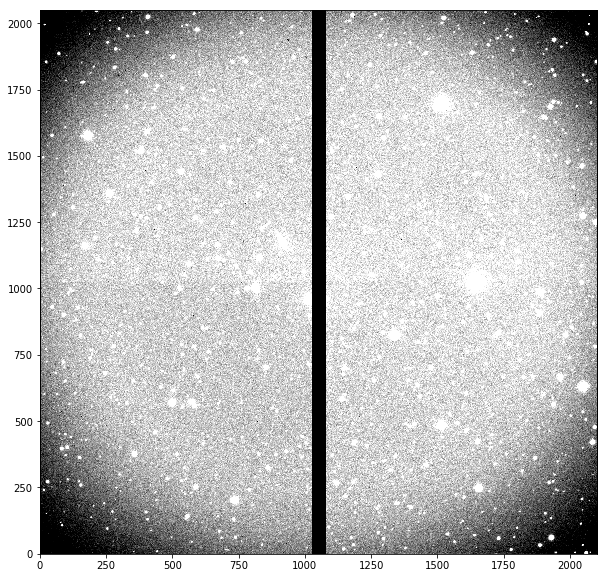

In [39]:
wolf = fits.getdata('Wolf1346/wolf1346_.0001.fits')
biasfree_wolf = wolf - masterbias
plt.figure(figsize=(20, 10))
plt.imshow(biasfree_wolf, vmin=np.percentile(biasfree_wolf, 5), vmax=np.percentile(biasfree_wolf, 90),
           origin='lower', cmap='binary_r', interpolation='nearest')

In [40]:
flat_list = glob.glob('Wolf1346/flat.*.fits')
for flatfile in flat_list:
    hdu = fits.open(flatfile)
    header = hdu[0].header
    print(header['filter'])
    print(flatfile)

J-C Rc
Wolf1346/flat.0031.fits
J-C Rc
Wolf1346/flat.0027.fits
Wash M
Wolf1346/flat.0007.fits
Wash M
Wolf1346/flat.0011.fits
Wash M
Wolf1346/flat.0010.fits
Wash M
Wolf1346/flat.0006.fits
J-C Rc
Wolf1346/flat.0026.fits
J-C Rc
Wolf1346/flat.0030.fits
J-C Rc
Wolf1346/flat.0040.fits
J-C Rc
Wolf1346/flat.0017.fits
J-C Rc
Wolf1346/flat.0037.fits
J-C Rc
Wolf1346/flat.0021.fits
J-C Rc
Wolf1346/flat.0020.fits
J-C Rc
Wolf1346/flat.0036.fits
Wash M
Wolf1346/flat.0016.fits
J-C Rc
Wolf1346/flat.0041.fits
J-C Rc
Wolf1346/flat.0039.fits
Wash M
Wolf1346/flat.0015.fits
J-C Rc
Wolf1346/flat.0023.fits
J-C Rc
Wolf1346/flat.0035.fits
J-C Rc
Wolf1346/flat.0019.fits
J-C Rc
Wolf1346/flat.0018.fits
J-C Rc
Wolf1346/flat.0034.fits
J-C Rc
Wolf1346/flat.0022.fits
Wash M
Wolf1346/flat.0014.fits
J-C Rc
Wolf1346/flat.0038.fits
J-C Rc
Wolf1346/flat.0025.fits
J-C Rc
Wolf1346/flat.0033.fits
Wash M
Wolf1346/flat.0009.fits
J-C Rc
Wolf1346/flat.0029.fits
Wash M
Wolf1346/flat.0013.fits
Wash M
Wolf1346/flat.0005.fits
Wash M
W

In [41]:
file = fits.open('quadRU.fits')
image = file[0].data
mean, median, std = sigma_clipped_stats(image, sigma = 3.0)
print((mean, median, std))
daofind = DAOStarFinder(fwhm = 3.0, threshold = 3.*std)
sources = daofind(image - median)
for col in sources.colnames:
    sources[col].info.format = '%.8g'
print(sources)

(270.93660468351146, 267.3033979295908, 23.28821444495957)
 id xcentroid ycentroid  sharpness  ... sky    peak      flux       mag    
--- --------- ---------- ---------- ... --- --------- --------- -----------
  1 561.24032 0.98844182 0.26166317 ...   0 61138.279 779.08434  -7.2289612
  2 191.31778  1.7511154 0.46223046 ...   0 136.31184 1.1100657 -0.11337175
  3 563.32306  2.5362342 0.38136097 ...   0 60631.672 447.63017  -6.6272984
  4 633.88426  5.7279147 0.59304799 ...   0 153.79991 1.1938254 -0.19235203
  5 565.16586  5.3306433 0.52517768 ...   0 60689.042 601.39825  -6.9479054
  6 111.42178  8.5959945 0.54964855 ...   0 152.80112 1.1900256 -0.18889078
  7 366.20083  17.844072    0.95017 ...   0 152.23613 1.7138915 -0.58495833
  8 172.86073  24.842898 0.39871687 ...   0 3608.1145  26.87817  -3.5734992
  9 587.58473  36.755588   0.451668 ...   0 1895.2595 12.606639  -2.7514983
 10 550.59566  40.523033  0.4503779 ...   0 490.22498 3.5904653  -1.3878768
...       ...        ...     

 id      xcenter            ycenter       aperture_sum
           pix                pix                     
--- ------------------ ------------------ ------------
 19  547.9912832756464  72.01220089834707  19188.85517
  2 191.31778268692165 1.7511154302632608  19287.02613
229 122.95612996326078 1009.7682123530665  19410.60875
141  534.9819678484498  644.9973993818148  20215.82372
198  490.0208811328106  919.9394449191993  20786.37036
159 153.44221584851186  745.0316913053565  20796.14917
  7   366.200826429514 17.844071909007425  20847.90821
106  69.06705869954085  495.6828467655255  21078.07565
 30  583.2802462917598  132.7790767247931  21141.93632
124  517.6413098101563  566.0338913014677  21282.14563
...                ...                ...          ...
 47 1016.6850017743496  224.4659317162284  265426.4283
 52  969.6098391581594 248.25006401825325  333223.0397
 87 197.67409624357157 404.27071102539105  403923.2796
177 1021.5354782521938  828.4151764204164    493491.77
  1  561.2

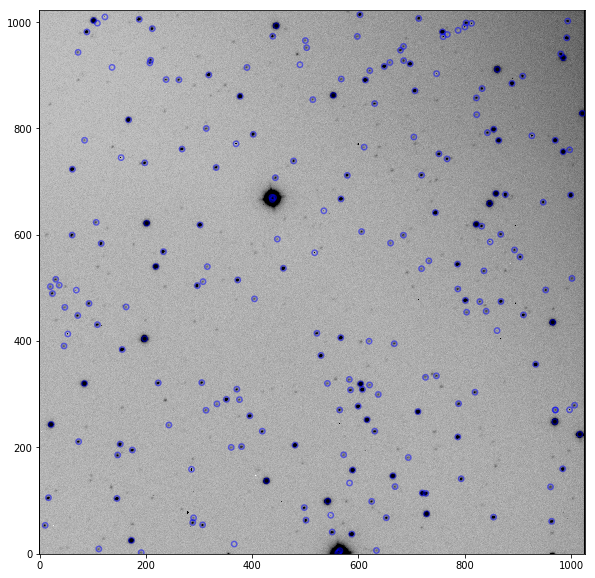

In [99]:
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from photutils import CircularAperture
positions = (sources['xcentroid'], sources['ycentroid'])
apertures = CircularAperture(positions, r=5)
norm = ImageNormalize(stretch=SqrtStretch())
phot_table = aperture_photometry(image, apertures, method = 'center')
phot_table['aperture_sum'].info.format = '%.10g'
phot_table.sort('aperture_sum')
print(phot_table)
plt.figure(figsize=(20, 10))
plt.imshow(image, cmap='Greys', origin='lower', vmin = 20,vmax = 600)
apertures.plot(color='blue', lw=1.5, alpha=0.5)

In [100]:
annulus_apertures = CircularAnnulus(positions, r_in = 8, r_out = 10)
phot_table_2 = aperture_photometry(image, annulus_apertures)
phot_table_2.sort('aperture_sum')
print(phot_table_2)
bkg_mean = phot_table_2['aperture_sum']/annulus_apertures.area()
bkg_sum = bkg_mean * apertures.area()
final_sum = phot_table['aperture_sum'] - bkg_sum
print(final_sum)

 id      xcenter            ycenter          aperture_sum   
           pix                pix                           
--- ------------------ ------------------ ------------------
  2 191.31778268692165 1.7511154302632608  17170.47433638846
  4  633.8842565812256  5.727914688489536 23445.033938616212
230  602.8223372773192   1014.12687119569  25679.28374104802
195 136.30609278450297  914.9526106017554  27082.31152896219
167  84.69761524971197  777.7355078664921 27173.818535811126
206  72.40318448866239   943.196763993516 27273.221448077493
159 153.44221584851186  745.0316913053565  27827.64445431055
216  89.06200495040791  981.5776071995067  27908.91893425207
  6 111.42178251857273  8.595994487033687 28033.831527628667
188  238.0229196977112  891.8864254901595 28118.455222584118
...                ...                ...                ...
222 108.78209578571287  998.0802605082813  71410.53515618009
205  980.8226435298516  940.2090444249808   98049.1557279807
  3   563.323057603488 2

The slope is  0.9097443703561733


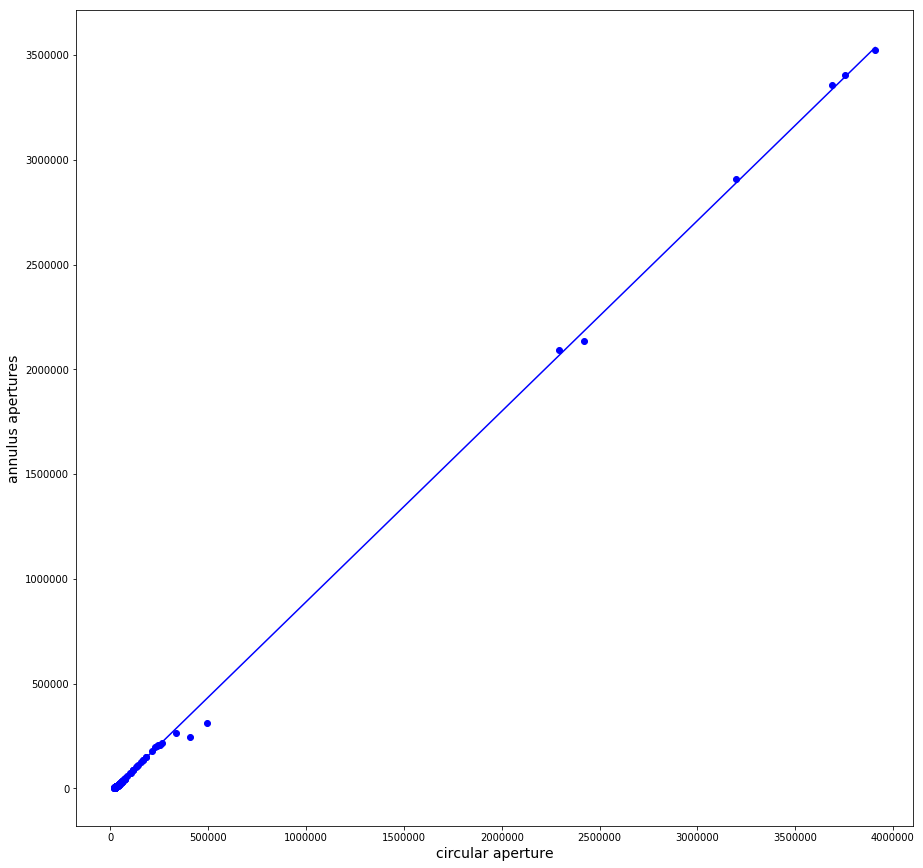

In [101]:
plt.figure(figsize=(15, 15))
plt.plot(phot_table['aperture_sum'],final_sum, 'bo')
plt.xlabel('circular aperture',size = 14)
plt.ylabel('annulus apertures',size = 14)
slope, intercept = np.polyfit(phot_table['aperture_sum'],final_sum,1)
lines = [slope * i + intercept for i in phot_table['aperture_sum']]
plt.plot(phot_table['aperture_sum'],lines,'b')
print('The slope is ',slope)

In [102]:
from photutils.psf import IntegratedGaussianPRF, DAOGroup
from photutils.background import MMMBackground, MADStdBackgroundRMS
from astropy.modeling.fitting import LevMarLSQFitter
from astropy.stats import gaussian_sigma_to_fwhm
from photutils.detection import IRAFStarFinder

 id        x_0                y_0                flux_0      
--- ------------------ ------------------ -------------------
229 122.95612996326078 1009.7682123530665 -1687.0771848221932
159 153.44221584851186  745.0316913053565 -1298.8367748255168
195 136.30609278450297  914.9526106017554   -170.932476485552
 19  547.9912832756464  72.01220089834707   98.67908006958305
106  69.06705869954085  495.6828467655255  422.96562703650073
167  84.69761524971197  777.7355078664921    551.280345936599
206  72.40318448866239   943.196763993516   596.7079121367543
  7   366.200826429514 17.844071909007425   820.4027529901239
141  534.9819678484498  644.9973993818148  1146.2128172821817
 30  583.2802462917598  132.7790767247931  1163.7508763910305
...                ...                ...                 ...
 23   542.293573395526  98.76229939313276  256250.13935969613
 47 1016.6850017743496 224.46593171622837    272696.120234169
 52  969.6098391581594 248.25006401825325  343159.16959296155
 87 197.

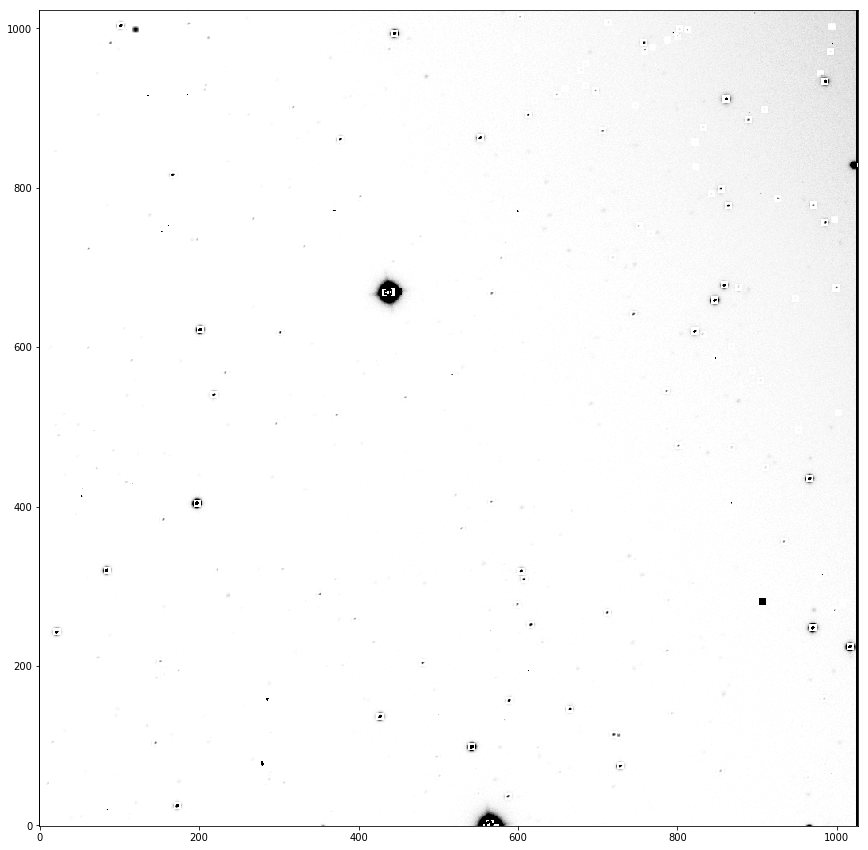

In [108]:
sigma_psf = 3.0
mmm_bkg = MMMBackground()
fitter = LevMarLSQFitter()
psf_model = IntegratedGaussianPRF(sigma = sigma_psf)
daogroup = DAOGroup(2.0*sigma_psf*gaussian_sigma_to_fwhm)
photometry = IterativelySubtractedPSFPhotometry(finder=daofind,
                                                group_maker=daogroup,
                                                bkg_estimator=mmm_bkg,
                                                psf_model=psf_model,
                                                fitter=LevMarLSQFitter(),
                                                niters = 1,
                                                fitshape=(9,9))

result_tab = photometry(image)
result_tab.sort('flux_0')
print(result_tab['id', 'x_0', 'y_0', 'flux_0'])
residual_image = photometry.get_residual_image()
plt.figure(figsize=(15, 15))
plt.imshow(residual_image, cmap='Greys', origin='lower', vmin = 20,vmax = 600)

the slope is 1.4294361304276912


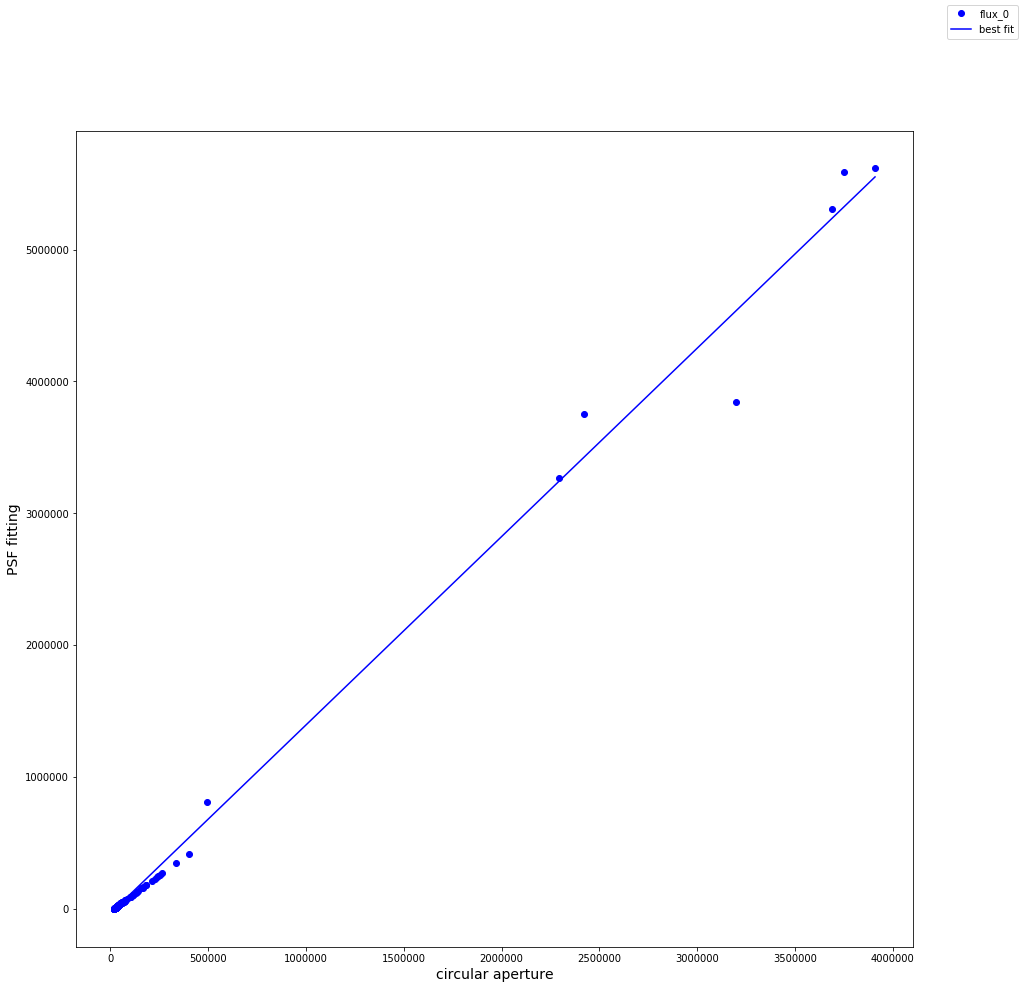

In [106]:
import matplotlib.lines as lines
fig, ax = plt.subplots()
fig.set_size_inches(15,15)
ax.plot(phot_table['aperture_sum'],result_tab['flux_0'],'bo')

slope, intercept = np.polyfit(phot_table['aperture_sum'],result_tab['flux_0'],1)
line = [slope * i + intercept for i in phot_table['aperture_sum']]
ax.plot(phot_table['aperture_sum'],line,'b',label = 'best fit')
fig.legend()
ax.set_xlabel('circular aperture',size=14)
ax.set_ylabel('PSF fitting',size = 14)
print('the slope is',slope)